In [1]:
# Importing all necessary packages and files.
import pandas as pd
import numpy as np
import model_creation as mc
import evaluation_model as em
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
# Import all pre-processed data 

# Dataset WITHOUT Personal Information
X_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_xFeat.csv')
y_train = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_train_y.csv')
X_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_xFeat.csv')
y_test = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/no_pi_test_y.csv')

# Dataset WITH Personal Information
X_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_xFeat.csv')
y_train_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_train_y.csv')
X_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_xFeat.csv')
y_test_pi = pd.read_csv('/Users/aarushbedi/PycharmProjects/aarush_pesonal/CS_334/Processed Data/pi_test_y.csv')

# Building Datasets
Creating the different Datasets that will be required for the modelling section.
There will be 6 datasets:
- Base dataset (i.e. with Personal Information)
- No PI dataset
- No PI w/ Lat & Long
- No PI w/ Year Born
- No PI w/ Gender
- No PI w/ Jobs
- No PI w/ first and last name 

#### Dataset 1 - including latitude and longitude

In [3]:
# Creating dataset with latitude and longitude
X_train_lat_long = X_train.copy()
y_train_lat_long = y_train_pi.copy()
X_test_lat_long = X_test.copy()
y_test_lat_long = y_test_pi.copy()

X_train_lat_long['lat'] = X_train_pi['lat']
X_train_lat_long['long'] = X_train_pi['long']
X_test_lat_long['lat'] = X_test_pi['lat']
X_test_lat_long['long'] = X_test_pi['long']

#### Dataset 2 - including year born

In [4]:
# Creating dataset with year born
X_train_year_born = X_train.copy()
y_train_year_born = y_train_pi.copy()
X_test_year_born = X_test.copy()
y_test_year_born = y_test_pi.copy()

X_train_year_born['year_born'] = X_train_pi['year_born']
X_test_year_born['year_born'] = X_test_pi['year_born']

#### Dataset 3 - including gender

In [5]:
# Creating dataset with gender
X_train_gender = X_train.copy()
y_train_gender = y_train_pi.copy()
X_test_gender = X_test.copy()
y_test_gender = y_test_pi.copy()

X_train_gender['gender'] = X_train_pi['gender']
X_test_gender['gender'] = X_test_pi['gender']

#### Dataset 4 - including job

In [6]:
# Creating dataset with jobs
X_train_job = X_train.copy()
y_train_job = y_train_pi.copy()
X_test_job = X_test.copy()
y_test_job = y_test_pi.copy()

X_train_job['job'] = X_train_pi['job']
X_test_job['job'] = X_test_pi['job']

#### Dataset 5 - including first and last name

In [7]:
# Creating dataset with first and last name 
X_train_first_last = X_train.copy()
y_train_first_last = y_train_pi.copy()
X_test_first_last = X_test.copy()
y_test_first_last = y_test_pi.copy()

X_train_first_last['first'] = X_train_pi['first']
X_train_first_last['last'] = X_train_pi['last']
X_test_first_last['first'] = X_test_pi['first']
X_test_first_last['last'] = X_test_pi['last']

# Model Creation
We will now use GridSearchCV to find the optimal parameters for the Decision tree model and XGBoost model, using the base dataset. 
These hyperparameters will be used for all the subsequent models. 
Post model creation we will be left with 6 models for each Decision Tree and XGBoost, totalling 12 models.

## Decision Trees

In [8]:
# Finding the optimal parameters for the decision tree classifier using the total dataset WITH personal information.
optimal_params_dt, results_dt = mc.Decision_Tree(X_train_pi, y_train_pi.values.ravel())

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [9]:
# Building Base Decision Tree on complete dataset (i.e. with personal information)
DT_base, time_elapsed_DT_base = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_pi, y_train_pi.values.ravel())

In [10]:
# Building Decision Tree fitted on NO PI dataset
DT_no_pi, time_elapsed_DT_no_pi = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train, y_train.values.ravel())

In [11]:
# Building Decision Tree on Dataset 1 - NO PI but w/ lat and long
DT_lat_long, time_elapsed_DT_lat_long = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_lat_long, y_train_lat_long.values.ravel())

In [12]:
# Building Decision Tree on Dataset 2 - NO PI but w/ year_born
DT_year_born, time_elapsed_DT_year_born = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_year_born, y_train_year_born.values.ravel())

In [13]:
# Building Decision Tree on Dataset 3 - NO PI but w/ gender
DT_gender, time_elapsed_DT_gender = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_gender, y_train_gender.values.ravel())

In [14]:
# Building Decision Tree on Dataset 4 - NO PI but w/ jobs
DT_jobs, time_elapsed_DT_jobs = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_job, y_train_job.values.ravel())

In [15]:
# Building Decision Tree on Dataset 5 - No PI but w/ first and last name
DT_first_last, time_elapsed_DT_first_last = mc.Modelling(DecisionTreeClassifier(**optimal_params_dt), X_train_first_last, y_train_first_last.values.ravel())

## XGBoost Models

In [16]:
# Finding the optimal parameters for the XGBoost model using the complete dataset, i.e. using the dataset WITH PI
optimal_params_xgb, results_xgb = mc.XGBoost(X_train_pi, y_train_pi.values.ravel())

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.913 total time=   2.7s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=500;, score=0.749 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=50;, score=0.745 total time=   1.3s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2;, score=0.796 total time=   0.9s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.700 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=500;, score=0.811 total time=   1.0s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=50;, score=0.866 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=2;, score=0.686 

In [17]:
# Building Base XGBoost model on complete dataset (i.e. with personal information)
XGB_base, time_elapsed_XGB_base = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_pi, y_train_pi.values.ravel())

In [18]:
# Building XGBoost model fitted on NO PI dataset
XGB_no_pi, time_elapsed_XGB_no_pi = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train, y_train.values.ravel())

In [19]:
# Building XGBoost model on Dataset 1 - NO PI but w/ lat and long
XGB_lat_long, time_elapsed_XGB_lat_long = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_lat_long, y_train_lat_long.values.ravel())

In [20]:
# Building XGBoost model on Dataset 2 - NO PI but w/ year_born
XGB_year_born, time_elapsed_XGB_year_born = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_year_born, y_train_year_born.values.ravel())

In [21]:
# Building XGBoost model on Dataset 3 - NO PI but w/ gender
XGB_gender, time_elapsed_XGB_gender = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_gender, y_train_gender.values.ravel())

In [22]:
# Building XGBoost model on Dataset 4 - NO PI but w/ jobs
XGB_jobs, time_elapsed_XGB_jobs = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_job, y_train_job.values.ravel())

In [23]:
# Building XGBoost model on Dataset 5 - NO PI but w/ first and last name 
XGB_first_last, time_elapsed_XGB_first_last = mc.Modelling(XGBClassifier(**optimal_params_xgb), X_train_first_last, y_train_first_last.values.ravel())

# Predictions 

## Decision Trees

In [24]:
# Predictions for Base Decision Tree
DT_base_predict = DT_base.predict(X_test_pi)

In [25]:
# Predictions for Decision Tree fitted on NO PI dataset
DT_no_pi_predict = DT_no_pi.predict(X_test)

In [26]:
# Predictions for Decision Tree fitted on Dataset 1
DT_lat_long_predict = DT_lat_long.predict(X_test_lat_long)

In [27]:
# Predictions for Decision Tree fitted on Dataset 2
DT_year_born_predict = DT_year_born.predict(X_test_year_born)

In [28]:
# Predictions for Decision Tree fitted on Dataset 3
DT_gender_predict = DT_gender.predict(X_test_gender)

In [29]:
# Predictions for Decision Tree fitted on Dataset 4
DT_jobs_predict = DT_jobs.predict(X_test_job)

In [30]:
DT_first_last_predict = DT_first_last.predict(X_test_first_last)

## XGBoost

In [31]:
# Predictions for Base XGBoost model
XGB_base_predict = XGB_base.predict(X_test_pi)

In [32]:
# Predictions for XGBoost model fitted on NO PI dataset
XGB_no_pi_predict = XGB_no_pi.predict(X_test)

In [33]:
# Predictions for XGBoost model fitted on Dataset 1 
XGB_lat_long_predict = XGB_lat_long.predict(X_test_lat_long)

In [34]:
# Predictions for XGBoost model fitted on Dataset 2
XGB_year_born_predict = XGB_year_born.predict(X_test_year_born)

In [35]:
# Predictions for XGBoost model fitted on Dataset 3
XGB_gender_predict = XGB_gender.predict(X_test_gender)

In [36]:
# Predictions for XGBoost model fitted on Dataset 4
XGB_jobs_predict = XGB_jobs.predict(X_test_job)

In [37]:
XGB_first_last_predict = XGB_first_last.predict(X_test_first_last)

# Model Evaluation 
We will now evaluate each model using the eval_model function located in evaluation_model.py
We will obtain the following metrics for evaluation:
- AUC
- AUPRC
- F1
- Accuracy
- Time
- ROC Curves

## Decision Trees

In [38]:
# Accuracy for Base Decision Tree
acc_base_dt, base_roc_dt = em.eval_model(DT_base, X_test_pi, y_test_pi.values.ravel(), DT_base_predict, time_elapsed_DT_base)
acc_base_dt

{'AUC': 0.8672665792984028,
 'AUPRC': 0.3886894594919346,
 'F1': 0.613880742913001,
 'Accuracy': 0.9964460519686172,
 'Time': 2.2109196669989615}

In [39]:
# Accuracy for NO PI Decision Tree
acc_no_pi_dt, no_pi_roc_dt = em.eval_model(DT_no_pi, X_test, y_test.values.ravel(), DT_no_pi_predict, time_elapsed_DT_no_pi)
acc_no_pi_dt

{'AUC': 0.8559445147919255,
 'AUPRC': 0.2899359589695588,
 'F1': 0.5160744500846023,
 'Accuracy': 0.9948535233570863,
 'Time': 1.4482496669952525}

In [40]:
# Accuracy for decision tree based on Dataset 1
acc_lat_long_dt, lat_long_roc_dt = em.eval_model(DT_lat_long, X_test_lat_long, y_test_lat_long.values.ravel(), DT_lat_long_predict, time_elapsed_DT_lat_long)
acc_lat_long_dt

{'AUC': 0.8743350382102583,
 'AUPRC': 0.21844213174940016,
 'F1': 0.41682847896440134,
 'Accuracy': 0.9918933995537321,
 'Time': 1.7507312090019695}

In [41]:
# Accuracy for decision tree based on Dataset 2
acc_year_born_dt, year_born_roc_dt = em.eval_model(DT_year_born, X_test_year_born, y_test_year_born.values.ravel(), DT_year_born_predict, time_elapsed_DT_year_born)
acc_year_born_dt

{'AUC': 0.866475837993695,
 'AUPRC': 0.2264803454399087,
 'F1': 0.4318026045236464,
 'Accuracy': 0.9925412078024904,
 'Time': 1.3780573750045733}

In [42]:
# Accuracy for decision tree based on Dataset 3
acc_gender_dt, gender_roc_dt = em.eval_model(DT_gender, X_test_gender, y_test_gender.values.ravel(), DT_gender_predict, time_elapsed_DT_gender)
acc_gender_dt

{'AUC': 0.8571313264074775,
 'AUPRC': 0.21904288410003425,
 'F1': 0.42609299097848713,
 'Accuracy': 0.9925592024760671,
 'Time': 1.5293088329999591}

In [43]:
# Accuracy for decision tree based on Dataset 4
acc_jobs_dt, jobs_roc_dt = em.eval_model(DT_jobs, X_test_job, y_test_job.values.ravel(), DT_jobs_predict, time_elapsed_DT_jobs)
acc_jobs_dt

{'AUC': 0.885386144065026,
 'AUPRC': 0.25299734112174216,
 'F1': 0.45781466113416325,
 'Accuracy': 0.9929460879579645,
 'Time': 1.632992375001777}

In [44]:
# Accuracy for decision tree based on dataset 5
acc_first_last_dt, first_last_roc_dt = em.eval_model(DT_first_last, X_test_first_last, y_test_first_last.values.ravel(), DT_first_last_predict, time_elapsed_DT_first_last)
acc_first_last_dt

{'AUC': 0.883810513144802,
 'AUPRC': 0.2315801728667874,
 'F1': 0.43024771838331155,
 'Accuracy': 0.9921363276470165,
 'Time': 1.446941667003557}

## XGBoost Models

In [45]:
# Accuracy for Base XGBoost model
acc_base_xgb, base_roc_xgb = em.eval_model(XGB_base, X_test_pi, y_test_pi.values.ravel(), XGB_base_predict, time_elapsed_XGB_base)
acc_base_xgb

{'AUC': 0.9973471706277091,
 'AUPRC': 0.9306188952400791,
 'F1': 0.8678815489749431,
 'Accuracy': 0.9989563089325559,
 'Time': 9.159292167001695}

In [46]:
# Accuracy for NO PI Decision Tree
acc_no_pi_xgb, no_pi_roc_xgb = em.eval_model(XGB_no_pi, X_test, y_test.values.ravel(), XGB_no_pi_predict, time_elapsed_XGB_no_pi)
acc_no_pi_xgb

{'AUC': 0.9931889094037238,
 'AUPRC': 0.8046749231871968,
 'F1': 0.6255355612682091,
 'Accuracy': 0.9960681638235083,
 'Time': 9.026351458000136}

In [47]:
# Accuracy for XGBoost model based on Dataset 1
acc_lat_long_xgb, lat_long_roc_xgb = em.eval_model(XGB_lat_long, X_test_lat_long, y_test_lat_long.values.ravel(), XGB_lat_long_predict, time_elapsed_XGB_lat_long)
acc_lat_long_xgb

{'AUC': 0.9939041723985658,
 'AUPRC': 0.8255689107596416,
 'F1': 0.6570135746606335,
 'Accuracy': 0.9965900093572303,
 'Time': 7.0160370000012335}

In [48]:
# Accuracy for XGBoost model based on Dataset 2
acc_year_born_xgb, year_born_roc_xgb = em.eval_model(XGB_year_born, X_test_year_born, y_test_year_born.values.ravel(), XGB_year_born_predict, time_elapsed_XGB_year_born)
acc_year_born_xgb

{'AUC': 0.9949728477381143,
 'AUPRC': 0.8559965018327421,
 'F1': 0.6876737720111213,
 'Accuracy': 0.9969678975023393,
 'Time': 7.128363499999978}

In [49]:
# Accuracy for XGBoost model based on Dataset 3
acc_gender_xgb, gender_roc_xgb = em.eval_model(XGB_gender, X_test_gender, y_test_gender.values.ravel(), XGB_gender_predict, time_elapsed_XGB_gender)
acc_gender_xgb

{'AUC': 0.9938804264134395,
 'AUPRC': 0.8221403037772487,
 'F1': 0.6405570060922541,
 'Accuracy': 0.9962840999064277,
 'Time': 6.994655167000019}

In [50]:
# Accuracy for XGBoost model based on Dataset 4
acc_jobs_xgb, jobs_roc_xgb = em.eval_model(XGB_jobs, X_test_job, y_test_job.values.ravel(), XGB_jobs_predict, time_elapsed_XGB_jobs)
acc_jobs_xgb

{'AUC': 0.9938375776313498,
 'AUPRC': 0.8185267620275274,
 'F1': 0.6362839614373357,
 'Accuracy': 0.9962661052328511,
 'Time': 7.294085500005167}

In [51]:
# Accuracy for XGBoost model based on Dataset 5
acc_first_last_xgb, first_last_roc_xgb = em.eval_model(XGB_first_last, X_test_first_last, y_test_first_last.values.ravel(), XGB_first_last_predict, time_elapsed_XGB_first_last)
acc_first_last_xgb

{'AUC': 0.9940644789999412,
 'AUPRC': 0.8182401448691171,
 'F1': 0.6852207293666027,
 'Accuracy': 0.9970488735334341,
 'Time': 7.041058750000957}

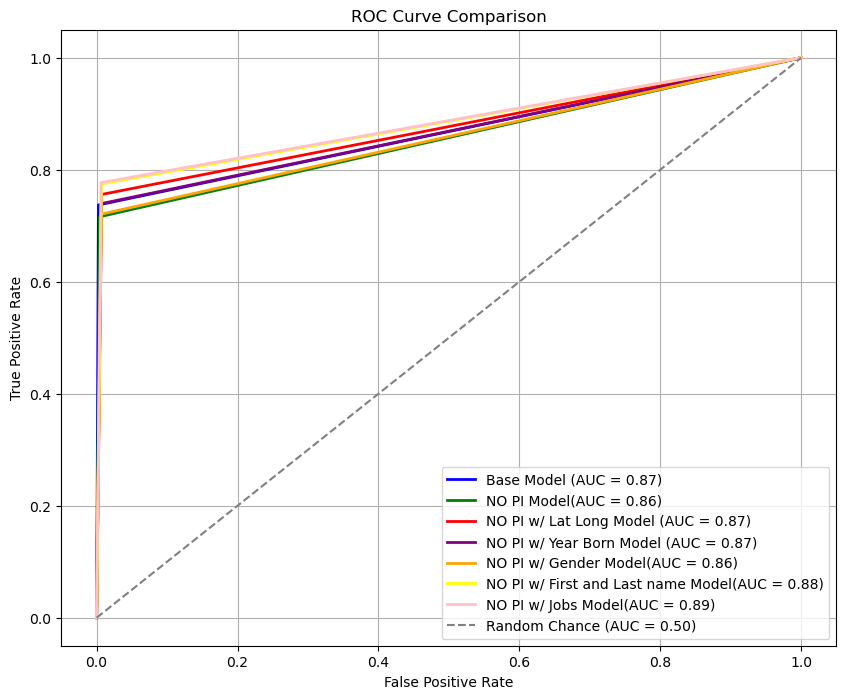

In [52]:
# ROC curve for Decision Tree
base_auc = acc_base_dt['AUC']
no_pi_auc = acc_no_pi_dt['AUC']
lat_long_auc = acc_lat_long_dt['AUC']
year_born_auc = acc_year_born_dt['AUC']
gender_auc = acc_gender_dt['AUC']
jobs_auc = acc_jobs_dt['AUC']
first_last_auc = acc_first_last_dt['AUC']

plt.figure(figsize=(10, 8))
plt.plot(base_roc_dt['fpr'], base_roc_dt['tpr'], label=f'Base Model (AUC = {base_auc:.2f})', color='blue', linewidth=2)
plt.plot(no_pi_roc_dt['fpr'], no_pi_roc_dt['tpr'], label=f'NO PI Model(AUC = {no_pi_auc:.2f})', color='green', linewidth=2)
plt.plot(lat_long_roc_dt['fpr'], lat_long_roc_dt['tpr'], label=f'NO PI w/ Lat Long Model (AUC = {lat_long_auc:.2f})', color='red', linewidth=2)
plt.plot(year_born_roc_dt['fpr'], year_born_roc_dt['tpr'], label=f'NO PI w/ Year Born Model (AUC = {year_born_auc:.2f})', color='purple', linewidth=2)
plt.plot(gender_roc_dt['fpr'], gender_roc_dt['tpr'], label=f'NO PI w/ Gender Model(AUC = {gender_auc:.2f})', color='orange', linewidth=2)
plt.plot(first_last_roc_dt['fpr'], first_last_roc_dt['tpr'], label=f'NO PI w/ First and Last name Model(AUC = {first_last_auc:.2f})', color='yellow', linewidth=2)
plt.plot(jobs_roc_dt['fpr'], jobs_roc_dt['tpr'], label=f'NO PI w/ Jobs Model(AUC = {jobs_auc:.2f})', color='pink', linewidth=2)
plt.plot([0, 1], [0, 1], label='Random Chance (AUC = 0.50)', color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

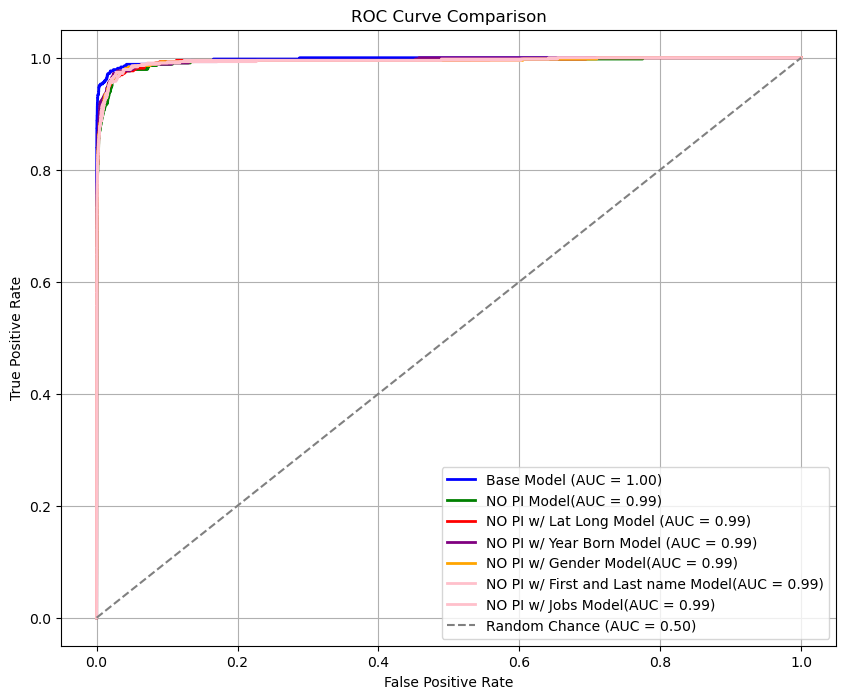

In [53]:
# ROC curve for XGBoost
base_auc = acc_base_xgb['AUC']
no_pi_auc = acc_no_pi_xgb['AUC']
lat_long_auc = acc_lat_long_xgb['AUC']
year_born_auc = acc_year_born_xgb['AUC']
gender_auc = acc_gender_xgb['AUC']
jobs_auc = acc_jobs_xgb['AUC']
first_last_auc = acc_first_last_xgb['AUC']

plt.figure(figsize=(10, 8))
plt.plot(base_roc_xgb['fpr'], base_roc_xgb['tpr'], label=f'Base Model (AUC = {base_auc:.2f})', color='blue', linewidth=2)
plt.plot(no_pi_roc_xgb['fpr'], no_pi_roc_xgb['tpr'], label=f'NO PI Model(AUC = {no_pi_auc:.2f})', color='green', linewidth=2)
plt.plot(lat_long_roc_xgb['fpr'], lat_long_roc_xgb['tpr'], label=f'NO PI w/ Lat Long Model (AUC = {lat_long_auc:.2f})', color='red', linewidth=2)
plt.plot(year_born_roc_xgb['fpr'], year_born_roc_xgb['tpr'], label=f'NO PI w/ Year Born Model (AUC = {year_born_auc:.2f})', color='purple', linewidth=2)
plt.plot(gender_roc_xgb['fpr'], gender_roc_xgb['tpr'], label=f'NO PI w/ Gender Model(AUC = {gender_auc:.2f})', color='orange', linewidth=2)
plt.plot(first_last_roc_xgb['fpr'], first_last_roc_xgb['tpr'], label=f'NO PI w/ First and Last name Model(AUC = {first_last_auc:.2f})', color='pink', linewidth=2)
plt.plot(jobs_roc_xgb['fpr'], jobs_roc_xgb['tpr'], label=f'NO PI w/ Jobs Model(AUC = {jobs_auc:.2f})', color='pink', linewidth=2)
plt.plot([0, 1], [0, 1], label='Random Chance (AUC = 0.50)', color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

# Visualizations

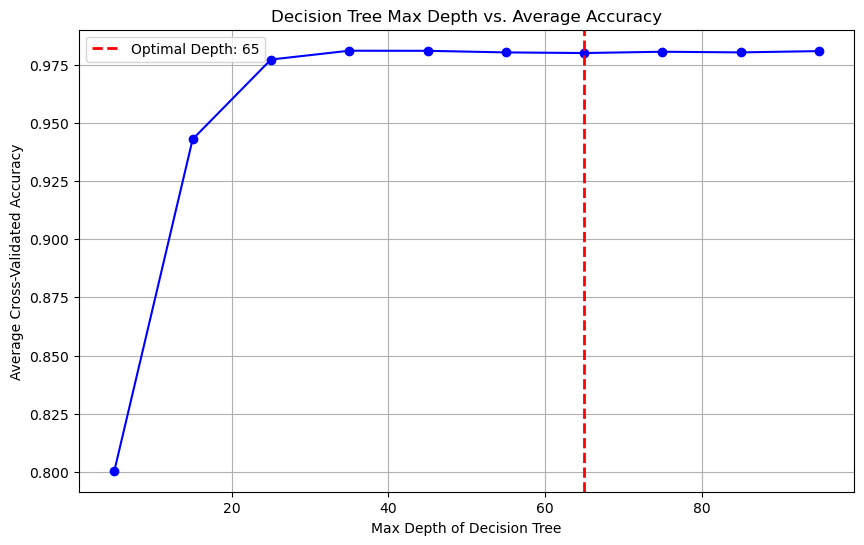

In [54]:
# Max tree depth Vs Average Accuracy
optimal_depth = optimal_params_dt['max_depth']
results_df = pd.DataFrame(results_dt)
mean_test_scores = results_df.groupby('param_max_depth')['mean_test_score'].mean().reset_index()
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(mean_test_scores['param_max_depth'], mean_test_scores['mean_test_score'], marker='o', linestyle='-', color='blue')
plt.axvline(x=optimal_depth, color='red', linestyle='--', linewidth=2, label=f'Optimal Depth: {optimal_depth}')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Average Cross-Validated Accuracy')
plt.title('Decision Tree Max Depth vs. Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance for Datasets
The idea of feature importance is to understand how important each feature is to the actual classification. 

## Decision Trees

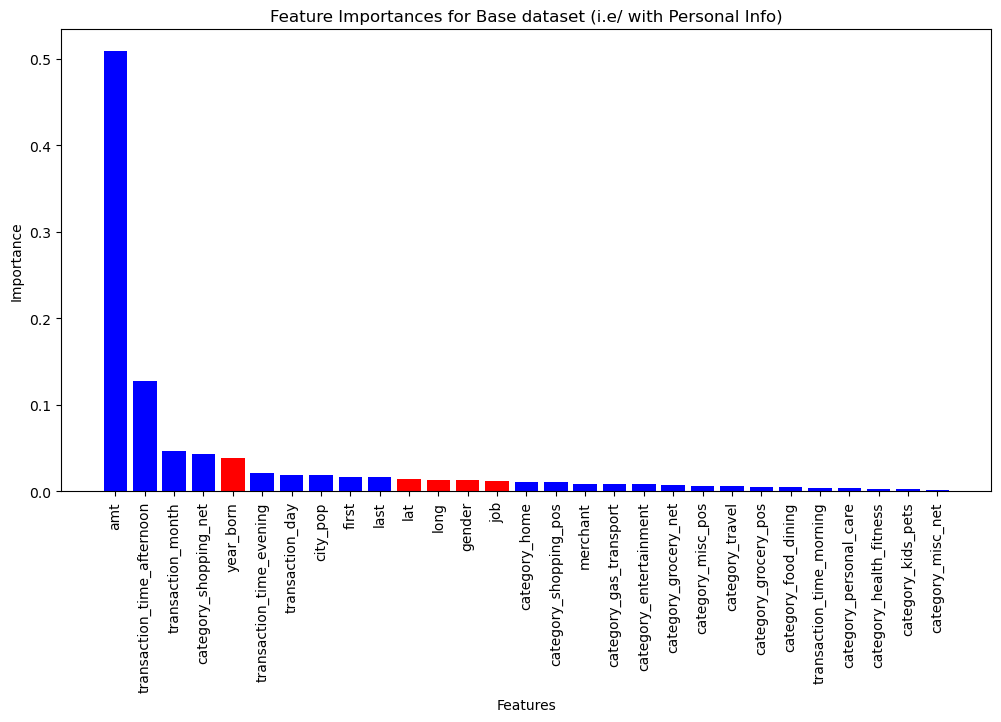

In [55]:
# Finding the important features from base dataset
base_model_imp = DT_base.feature_importances_

# Plotting the feature importance for base model
feature_names = X_train_pi.columns
indices = np.argsort(base_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Base dataset (i.e/ with Personal Info)")
plt.bar(range(len(base_model_imp)), base_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(base_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

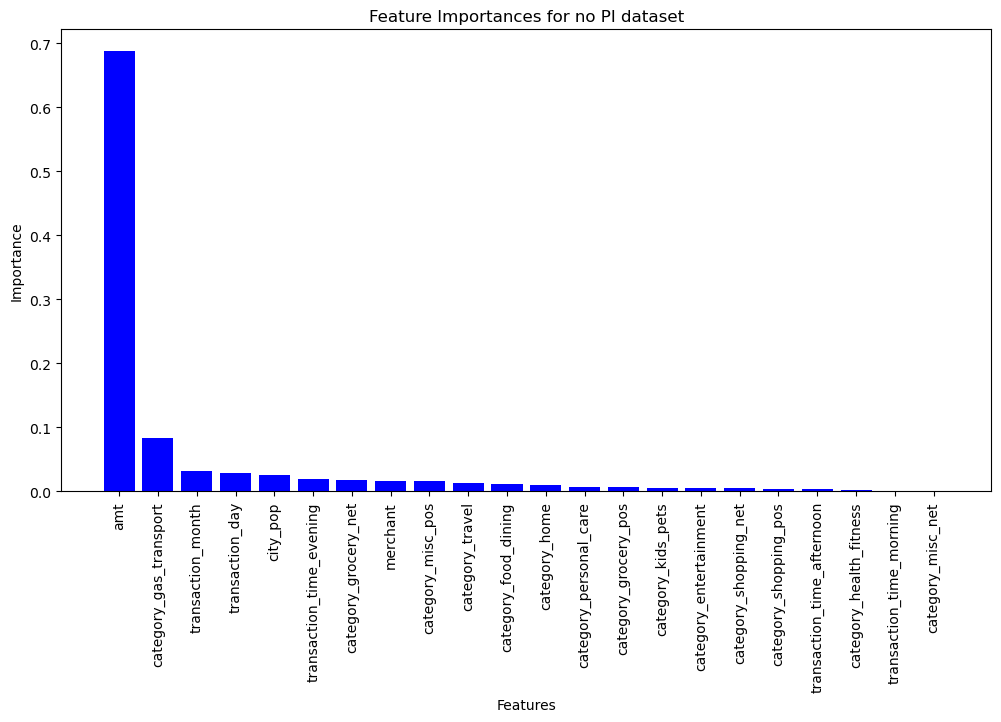

In [56]:
# Finding the important features from NO PI dataset
no_pi_model_imp = DT_no_pi.feature_importances_

# Plotting the feature importance for model with NO PI dataset
feature_names = X_train.columns
indices = np.argsort(no_pi_model_imp)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for no PI dataset")
plt.bar(range(len(no_pi_model_imp)), no_pi_model_imp[indices], color="b", align="center")
plt.xticks(range(len(no_pi_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

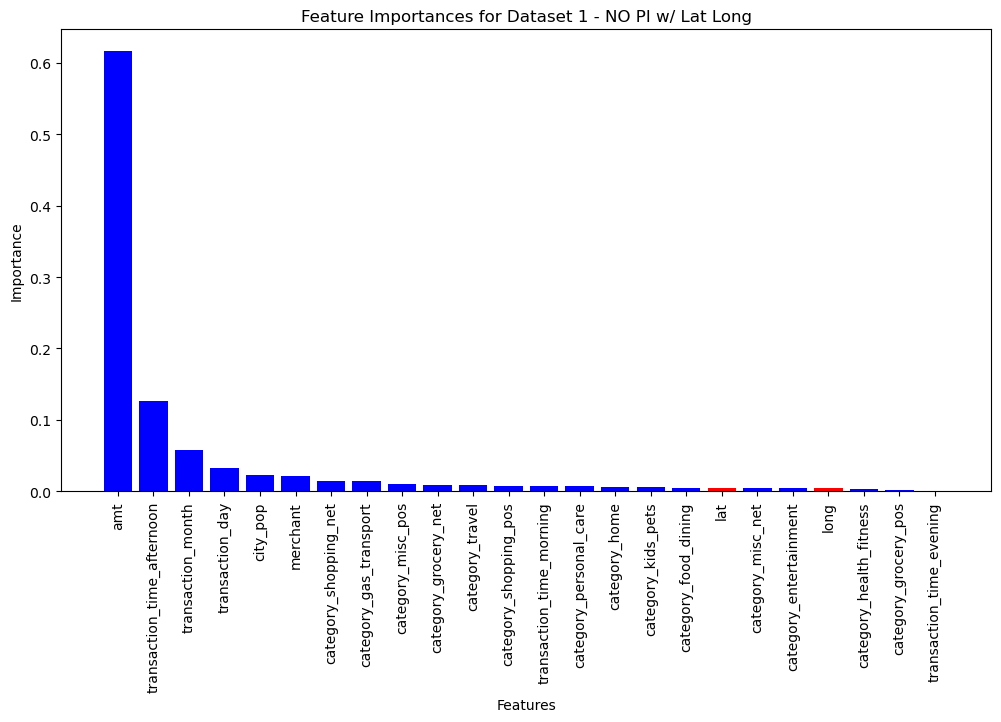

In [57]:
# Finding the important features from Dataset 1 - NO PI w/ lat long
lat_long_model_imp = DT_lat_long.feature_importances_

# Plotting the feature importance for model with dataset 1
feature_names = X_train_lat_long.columns
indices = np.argsort(lat_long_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 1 - NO PI w/ Lat Long")
plt.bar(range(len(lat_long_model_imp)), lat_long_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(lat_long_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

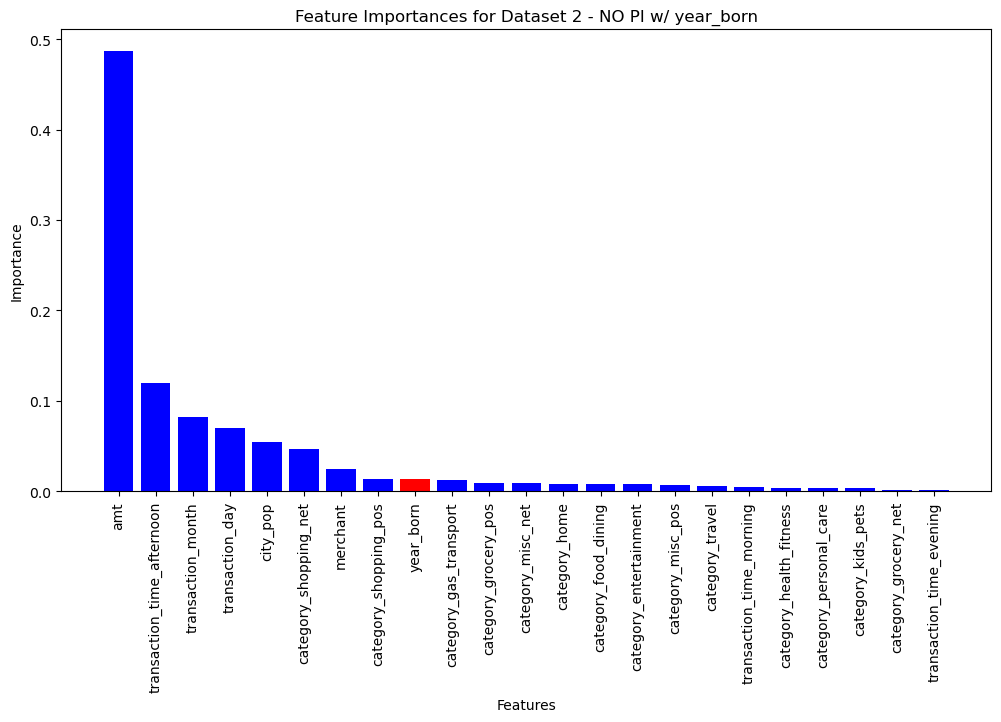

In [58]:
# Finding the important features from Dataset 2 - NO PI w/ year_born
year_born_model_imp = DT_year_born.feature_importances_

# Plotting the feature importance for model with datast 2
feature_names = X_train_year_born.columns
indices = np.argsort(year_born_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 2 - NO PI w/ year_born")
plt.bar(range(len(year_born_model_imp)), year_born_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(year_born_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

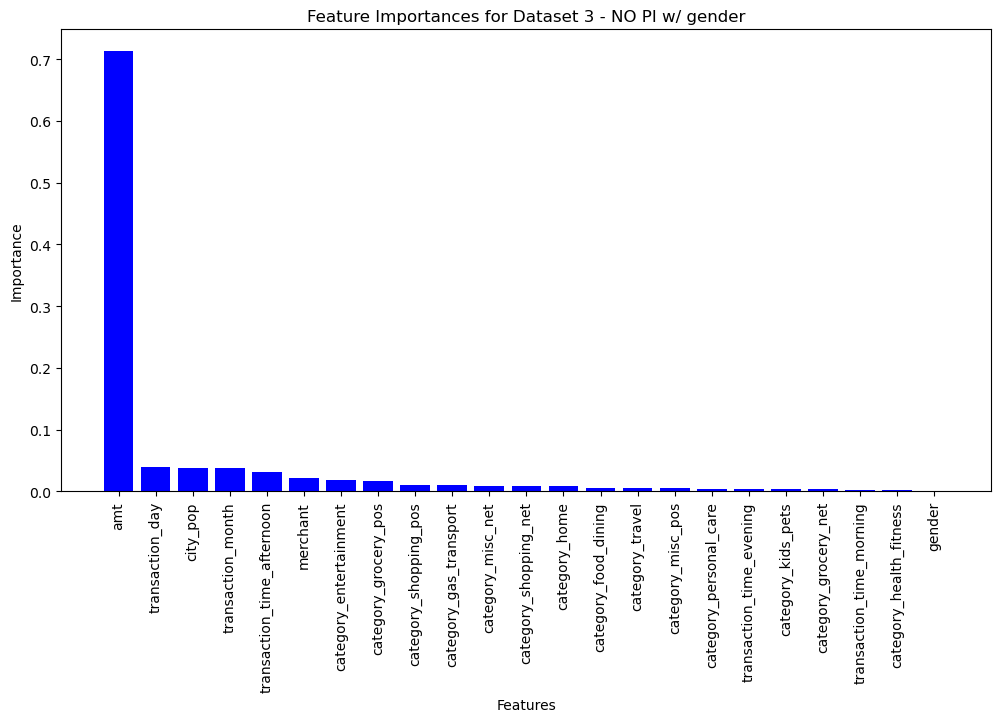

In [59]:
# Finding the important features from Dataset 3 - NO PI w/ gender
gender_model_imp = DT_gender.feature_importances_

# Plotting the feature importance for model with dataset 3
feature_names = X_train_gender.columns
indices = np.argsort(gender_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 3 - NO PI w/ gender")
plt.bar(range(len(gender_model_imp)), gender_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(gender_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

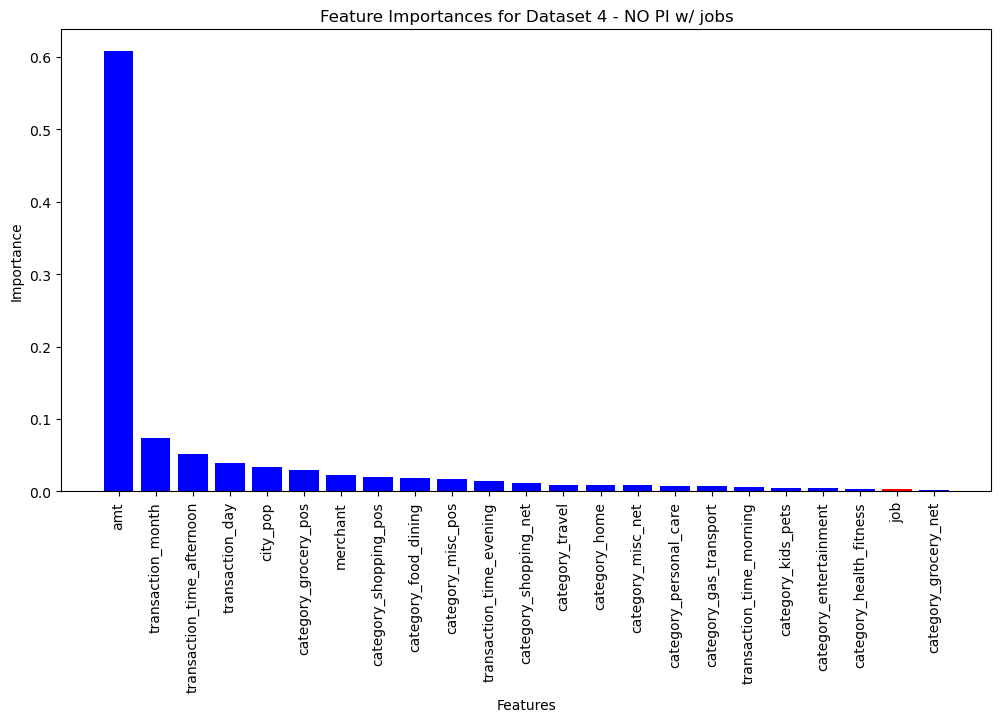

In [60]:
# Finding the important features from Dataset 4 - NO PI w/ jobs
jobs_model_imp = DT_jobs.feature_importances_

# Plotting the feature importance for model with dataset 4
feature_names = X_train_job.columns
indices = np.argsort(jobs_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 4 - NO PI w/ jobs")
plt.bar(range(len(jobs_model_imp)), jobs_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(jobs_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

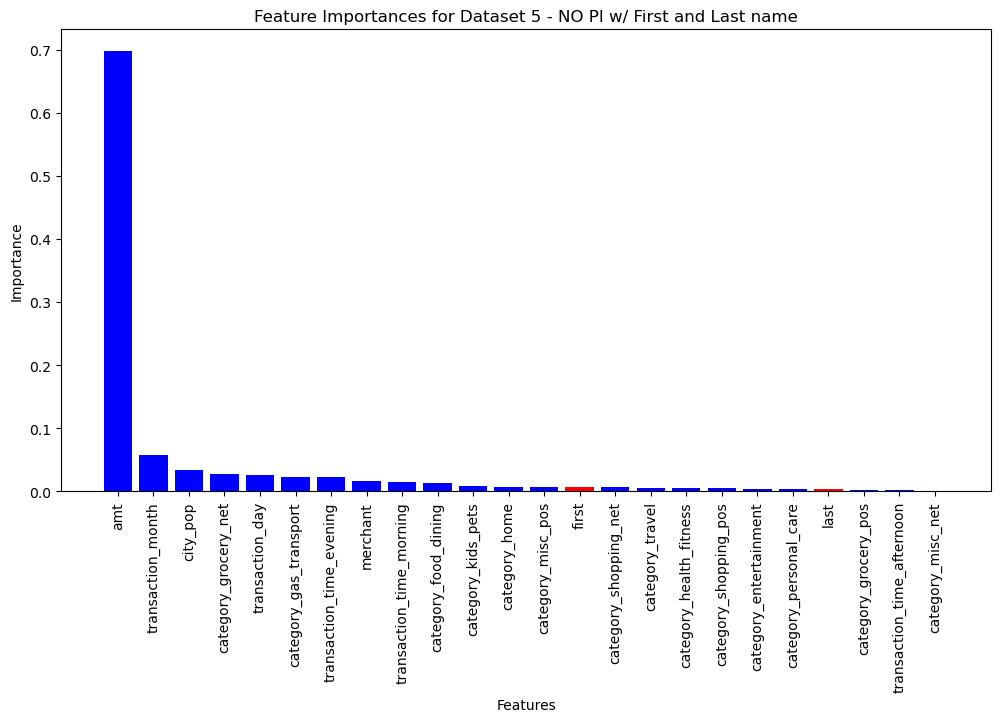

In [73]:
# Finding the important features from NO PI w/ dataset 5 - NO PI w/ first and last name 
first_last_model_imp = DT_first_last.feature_importances_

# Plotting the feature importance for model with NO PI dataset
feature_names = X_train_first_last.columns
indices = np.argsort(first_last_model_imp)[::-1]
highlight_features = ['first', 'last', 'year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 5 - NO PI w/ First and Last name")
plt.bar(range(len(first_last_model_imp)), first_last_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(first_last_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## XGBoost Models

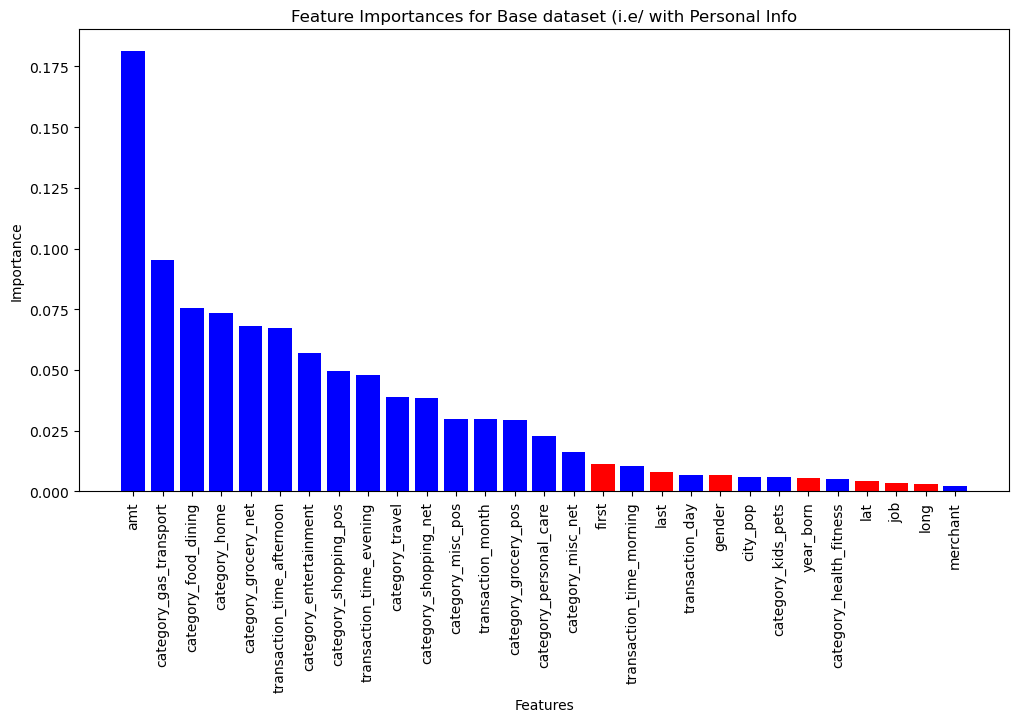

In [70]:
# Finding the important features from base dataset
base_model_imp = XGB_base.feature_importances_

# Plotting the feature importance for base model
feature_names = X_train_pi.columns
indices = np.argsort(base_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender','first', 'last' ]  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Base dataset (i.e/ with Personal Info")
plt.bar(range(len(base_model_imp)), base_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(base_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

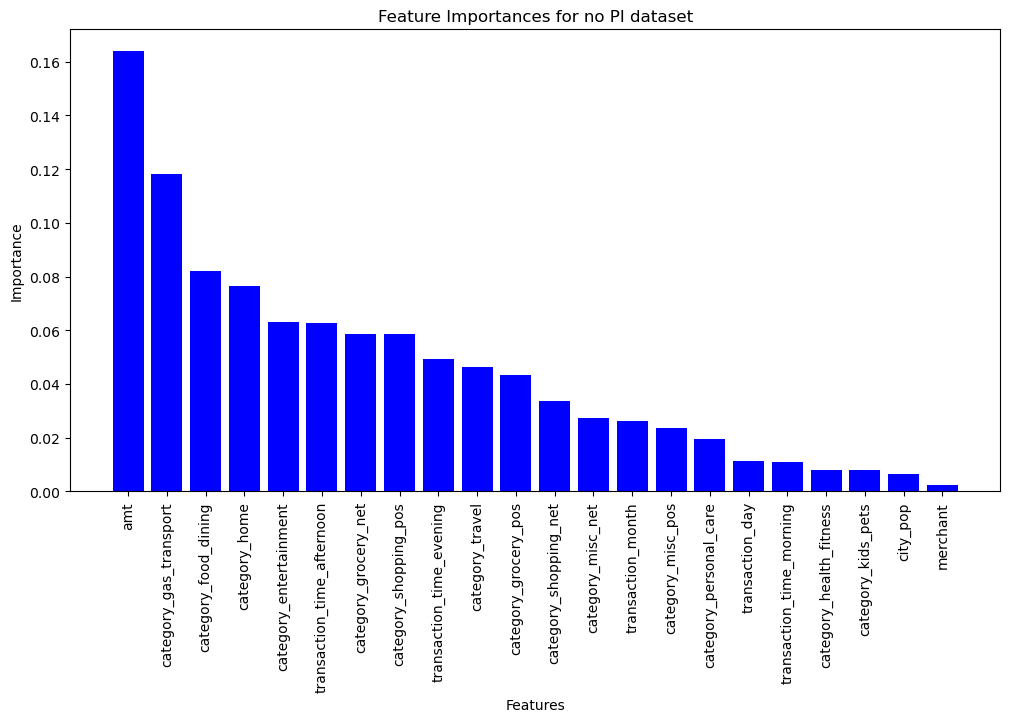

In [63]:
# Finding the important features from NO PI dataset
no_pi_model_imp = XGB_no_pi.feature_importances_

# Plotting the feature importance for model with NO PI dataset
feature_names = X_train.columns
indices = np.argsort(no_pi_model_imp)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for no PI dataset")
plt.bar(range(len(no_pi_model_imp)), no_pi_model_imp[indices], color="b", align="center")
plt.xticks(range(len(no_pi_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

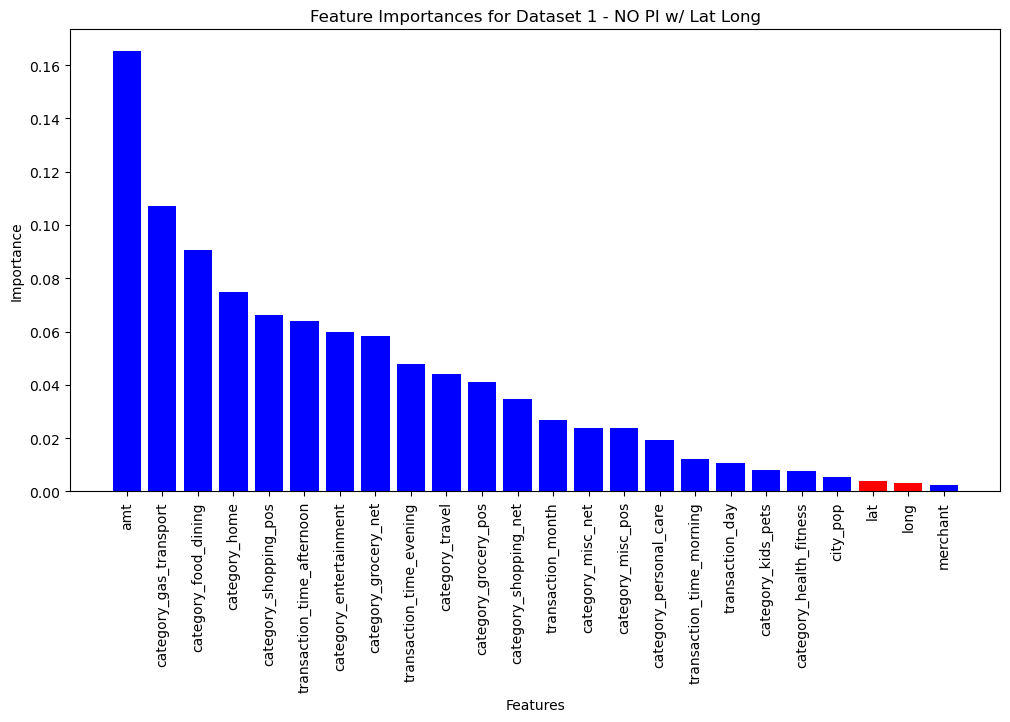

In [64]:
# Finding the important features from Dataset 1 - NO PI w/ lat long
lat_long_model_imp = XGB_lat_long.feature_importances_

# Plotting the feature importance for model with dataset 1
feature_names = X_train_lat_long.columns
indices = np.argsort(lat_long_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 1 - NO PI w/ Lat Long")
plt.bar(range(len(lat_long_model_imp)), lat_long_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(lat_long_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

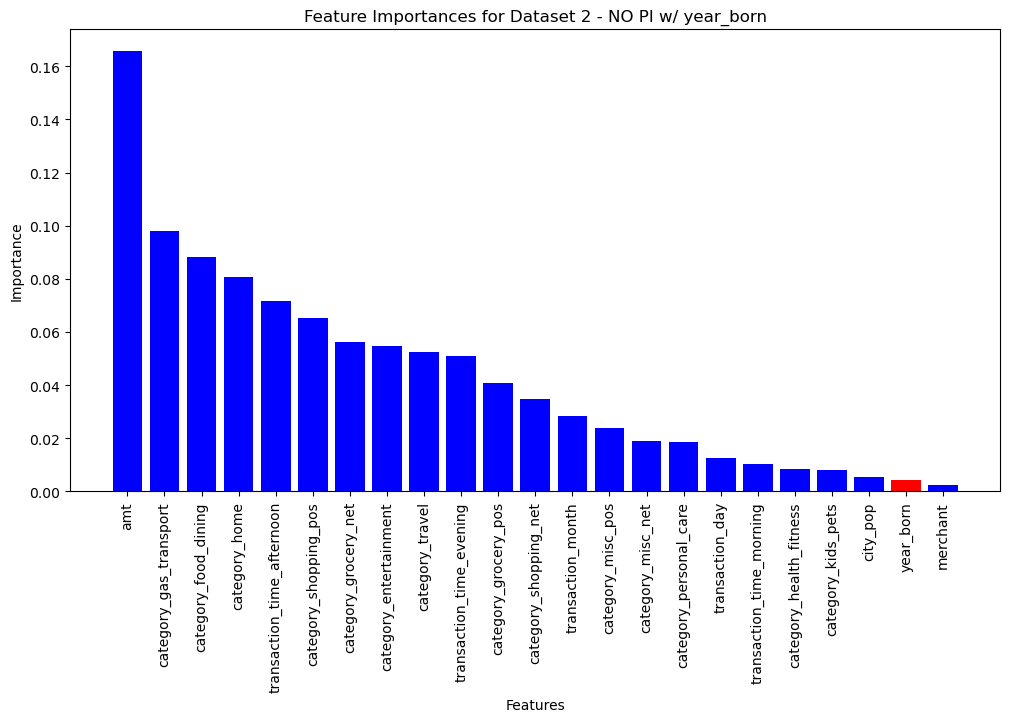

In [65]:
# Finding the important features from Dataset 2 - NO PI w/ year_born
year_born_model_imp = XGB_year_born.feature_importances_

# Plotting the feature importance for model with dataset 2
feature_names = X_train_year_born.columns
indices = np.argsort(year_born_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 2 - NO PI w/ year_born")
plt.bar(range(len(year_born_model_imp)), year_born_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(year_born_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

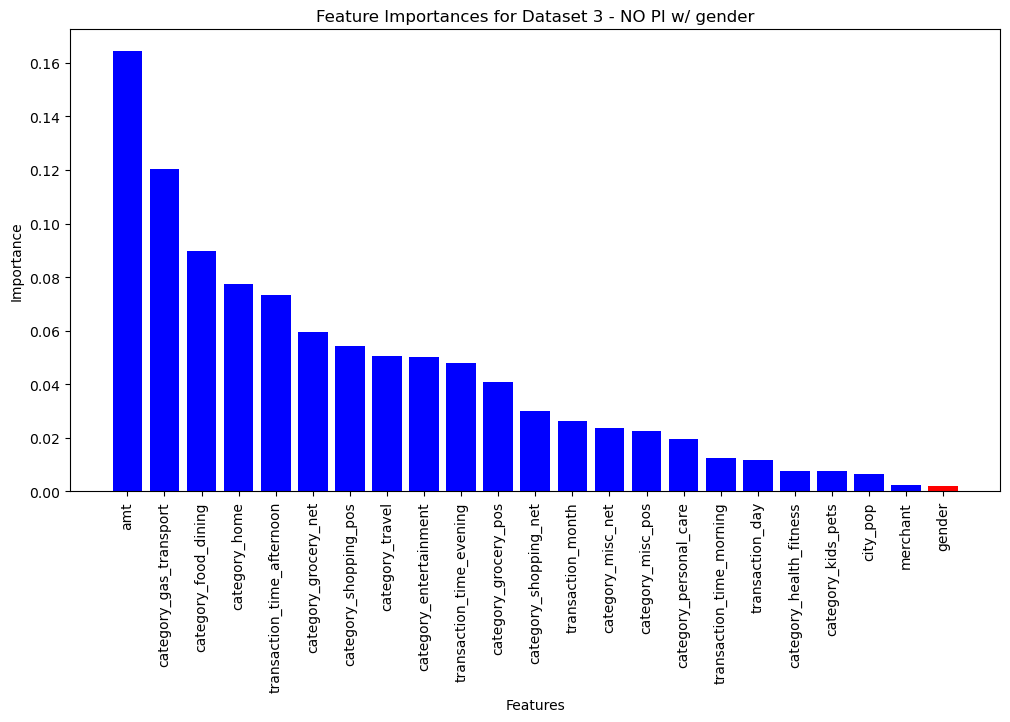

In [66]:
# Finding the important features from Dataset 3 - NO PI w/ gender
gender_model_imp = XGB_gender.feature_importances_

# Plotting the feature importance for model with dataset 3
feature_names = X_train_gender.columns
indices = np.argsort(gender_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 3 - NO PI w/ gender")
plt.bar(range(len(gender_model_imp)), gender_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(gender_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

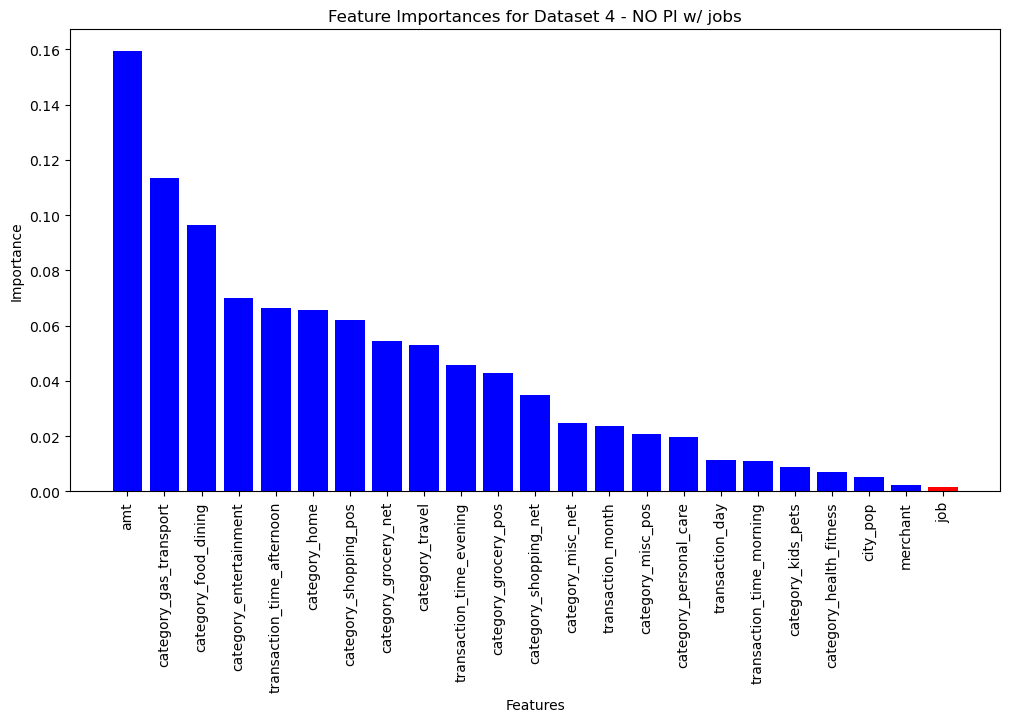

In [67]:
# Finding the important features from Dataset 4 - NO PI w/ jobs
jobs_model_imp = XGB_jobs.feature_importances_

# Plotting the feature importance for model with dataset 4
feature_names = X_train_job.columns
indices = np.argsort(jobs_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 4 - NO PI w/ jobs")
plt.bar(range(len(jobs_model_imp)), jobs_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(jobs_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

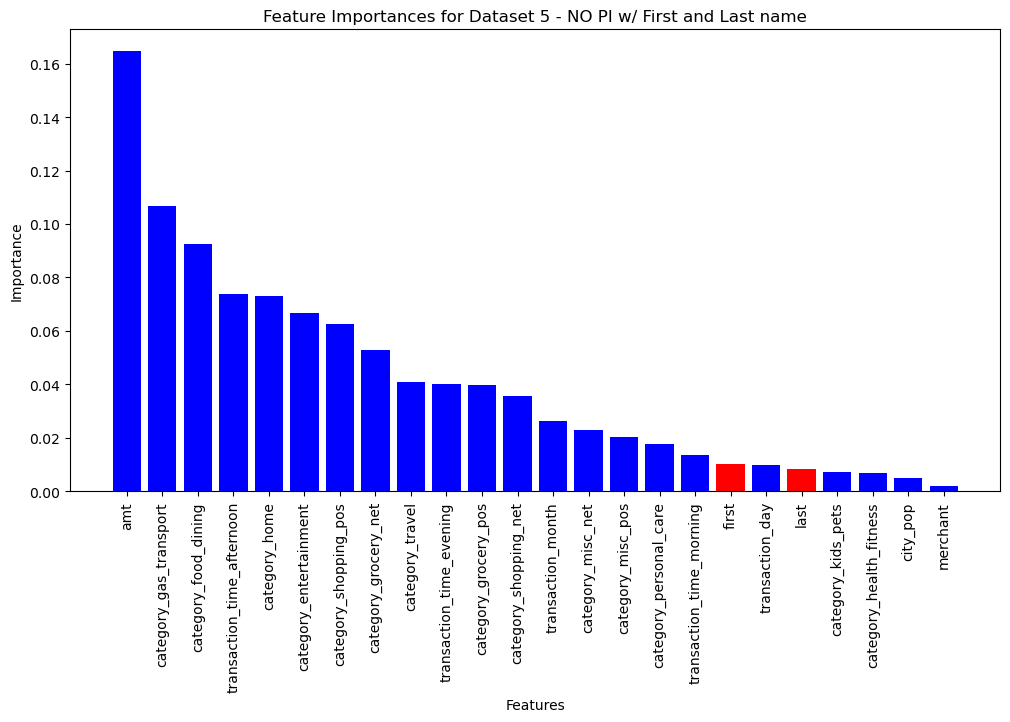

In [74]:
# Finding the important features from NO PI w/ dataset 5 - NO PI w/ first and last name 
first_last_model_imp = XGB_first_last.feature_importances_

# Plotting the feature importance for model with dataset 5
feature_names = X_train_first_last.columns
indices = np.argsort(first_last_model_imp)[::-1]
highlight_features = ['year_born', 'job', 'lat', 'long', 'gender', 'first', 'last']  
colors = ['b' if feature_names[i] not in highlight_features else 'r' for i in indices]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Dataset 5 - NO PI w/ First and Last name")
plt.bar(range(len(first_last_model_imp)), first_last_model_imp[indices], color=colors, align="center")
plt.xticks(range(len(first_last_model_imp)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()